<a href="https://colab.research.google.com/github/hardikcode-creator/ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0,class_sep=2.0)

In [15]:
df=pd.DataFrame(X)
df.columns=['feature1','feature2']
df['target']=y
df.head()

,feature1,feature2,target
0,0.252850,-3.202961,0
1,-1.352832,1.867473,1
2,1.282527,-2.626636,0
3,-1.602761,2.207754,1
4,-1.843363,2.485669,1


<Axes: xlabel='feature1', ylabel='feature2'>

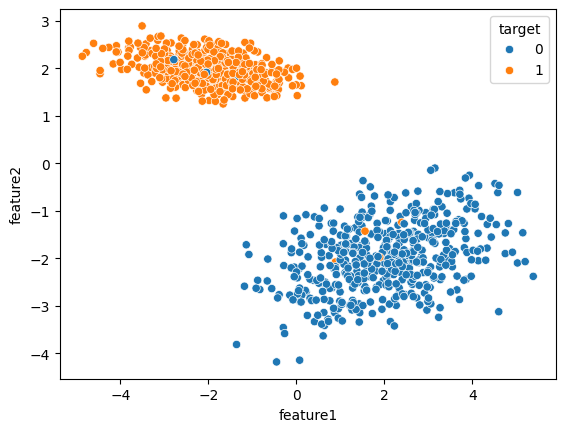

In [16]:
sns.scatterplot(x=df['feature1'],y=df['feature2'],hue=df['target'])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [19]:
y_pred=svc.predict(X_test)

In [20]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

In [27]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
accuracy_score(Y_test,y_pred)


0.995

<Axes: >

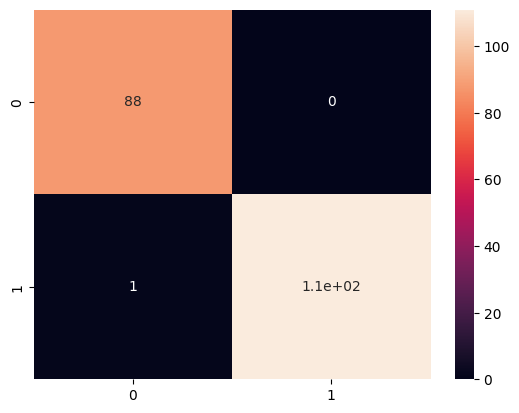

In [28]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [30]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.99      1.00       112

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [33]:
from sklearn.datasets import make_classification
X1,y1=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,class_sep=2.0)
df2=pd.DataFrame(X)
df2.columns=['feature1','feature2']
df2['target']=y
df2.head()

,feature1,feature2,target
0,1.903365,1.933671,1
1,-1.863655,-1.313701,0
2,-2.384475,2.846853,1
3,-1.878912,-3.658747,0
4,-2.265224,-1.817406,0


<Axes: xlabel='feature1', ylabel='feature2'>

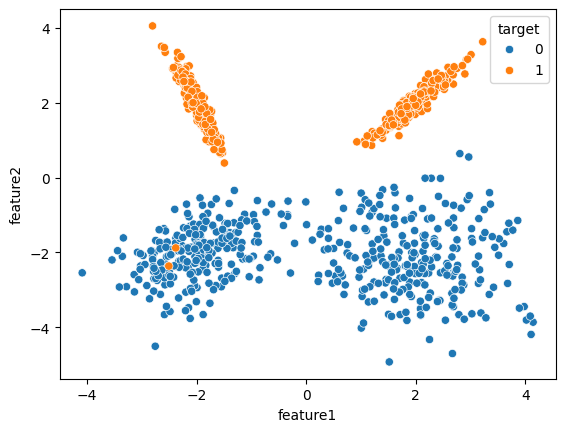

In [34]:
sns.scatterplot(x=df2['feature1'],y=df2['feature2'],hue=df2['target'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [37]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
accuracy_score(Y_test,y_pred)


0.985

In [39]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       104
           1       0.99      0.98      0.98        96

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



##Kernel implementation

In [43]:
x=np.linspace(-5,5,100)
y=np.sqrt(100-x**2)
y=np.hstack((y,-y))
x=np.hstack((x,x))

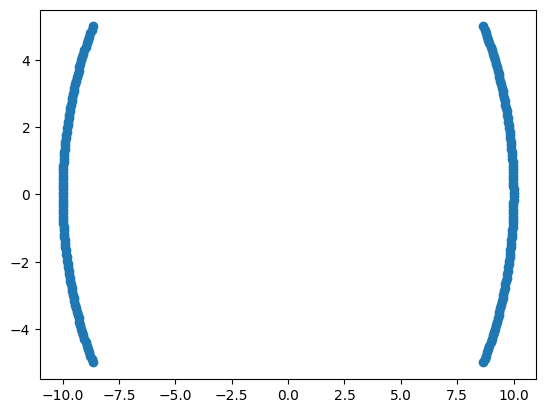

In [44]:
plt.scatter(y,x)

In [45]:
x1=np.linspace(-5,5,100)
y1=np.sqrt(25-x1**2)
y1=np.hstack((y1,-y1))
x1=np.hstack((x1,x1))

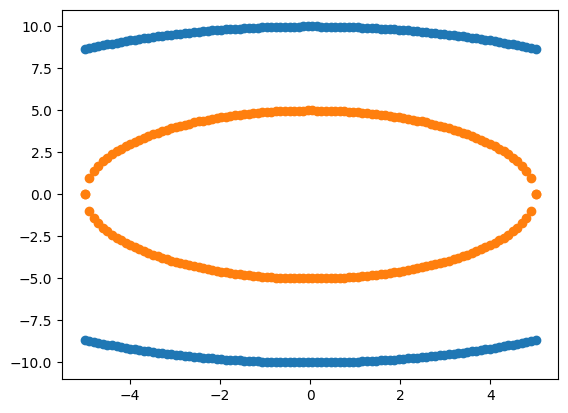

In [46]:
plt.scatter(x,y)
plt.scatter(x1,y1)

In [50]:
df1=pd.DataFrame(np.vstack([x,y]).T,columns=['x1','x2'])
df2=pd.DataFrame(np.vstack([x1,y1]).T,columns=['x1','x2'])
df1['target']=0
df2['target']=1
df=pd.concat([df1,df2],axis=0)
df.head()

,x1,x2,target
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [51]:
X=df.drop('target',axis=1)
y=df['target']


In [53]:
from sklearn.model_selection import train_test_split
df['X1**2']=df['x1']**2
df['X2**2']=df['x2']**2
df['X1*X2']=df['x1']*df['x2']
df.head()

,x1,x2,target,X1**2,X2**2,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [54]:
X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [58]:
import plotly.express as px
fig=px.scatter_3d(df,x='x1',y='x2',z='X1*X2',color='target')
fig.show()

In [59]:
fig1=px.scatter_3d(df,x='X1**2',y='X2**2',z='X1**2',color='target')
fig1.show()

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
accuracy_score(Y_test,y_pred)

1.0

## SVM regressor

In [61]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [63]:
X=df.drop('total_bill',axis=1)
y=df['total_bill']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
le2=LabelEncoder()
X_train['sex']=le.fit_transform(X_train['sex'])
X_train['smoker']=le1.fit_transform(X_train['smoker'])
X_train['time']=le2.fit_transform(X_train['time'])

X_test['sex']=le.transform(X_test['sex'])
X_test['smoker']=le1.transform(X_test['smoker'])
X_test['time']=le2.transform(X_test['time'])

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'),[3]
                                 )],remainder='passthrough')
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [82]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
svr=SVR(kernel='linear')
svr.fit(X_train,Y_train)
y_pred=svr.predict(X_test)
print(r2_score(y_pred,Y_test))
print(mean_absolute_error(y_pred,Y_test))

0.15981741964476592
3.9736841946427695


In [86]:
## Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train, Y_train)


y_pred2=grid.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.171 total time=   0.0s
[CV 2/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.043 total time=   0.0s
[CV 3/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 4/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.046 total time=   0.0s
[CV 5/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.090 total time=   0.0s
[CV 1/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.136 total time=   0.0s
[CV 2/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.019 total time=   0.0s
[CV 3/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.036 total time=   0.0s
[CV 4/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.021 total time=   0.0s
[CV 5/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.067 total time=   0.0s
[CV 1/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.208 total time=   0.0s
[CV 2/5] END .....C=0.001, gamma=1, kernel=poly

In [87]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [88]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_pred2,Y_test))
print(mean_absolute_error(y_pred2,Y_test))

-0.019643326999364552
4.173056589465979
